<a href="https://colab.research.google.com/github/HugoGom/Kaggle/blob/master/TITANICFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC FINAL

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np 

In [0]:
train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train['Sex'] = train['Sex'].str.replace("female", '0').str.replace('male', '1').astype("float")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train['Porto'] = train["Embarked"].str.replace("S", '19').str.replace('C', '3').str.replace('Q', '17').astype("float")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Porto
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S,19.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,19.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S,19.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S,19.0


In [0]:
train.Porto = pd.to_numeric(train['Porto'], errors='coerce').astype('Int64')

In [0]:
train.Porto = pd.to_numeric(train['Porto'], errors='coerce').fillna(0).astype(np.int64)

In [0]:
test['Porto'] = test["Embarked"].str.replace("S", '19').str.replace('C', '3').str.replace('Q', '17').astype("float")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Porto
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,17.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,19.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,17.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,19.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,19.0


In [0]:
test.Porto = pd.to_numeric(test['Porto'], errors='coerce').astype('Int64')

In [0]:
test.Porto = pd.to_numeric(test['Porto'], errors='coerce').fillna(0).astype(np.int64)

In [0]:
train.head()

In [0]:
test.head()

In [0]:
train.groupby(by=['Pclass'])['Survived'].agg(['mean','count'])

,mean,count
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


In [0]:
sex_survived= train.groupby(by=['Sex','Survived'])['Survived'].agg(['count']).reset_index()
sex_survived

,Sex,Survived,count
0,0.0,0,81
1,0.0,1,233
2,1.0,0,468
3,1.0,1,109


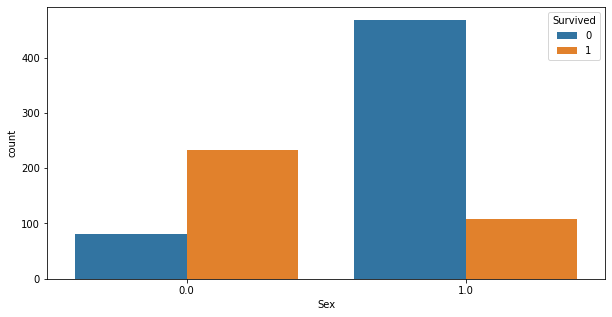

In [0]:
plt.figure(figsize=(10, 5))
sns.barplot(data=sex_survived, x='Sex',y='count', hue='Survived');

In [0]:
from google.colab import files
test["Survived"] = 0
test.loc[:,['PassengerId', 'Survived']].to_csv('sem_sobreviventes.csv', index = False)
files.download('sem_sobreviventes.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


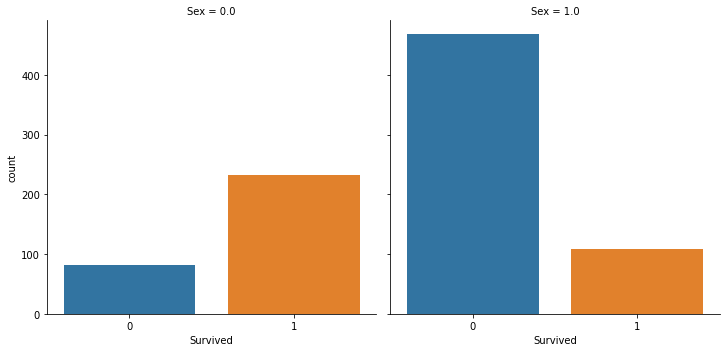

In [0]:
sns.factorplot(x="Survived", col="Sex", kind="count", data=train)

In [0]:
test['Survived'] = test.Sex == 'female'
test['Survived'] = test.Survived.apply(lambda x: int(x))
test.loc[:,['PassengerId', 'Survived']].to_csv('mulheres_sobreviventes.csv', index = False)
files.download('mulheres_sobreviventes.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


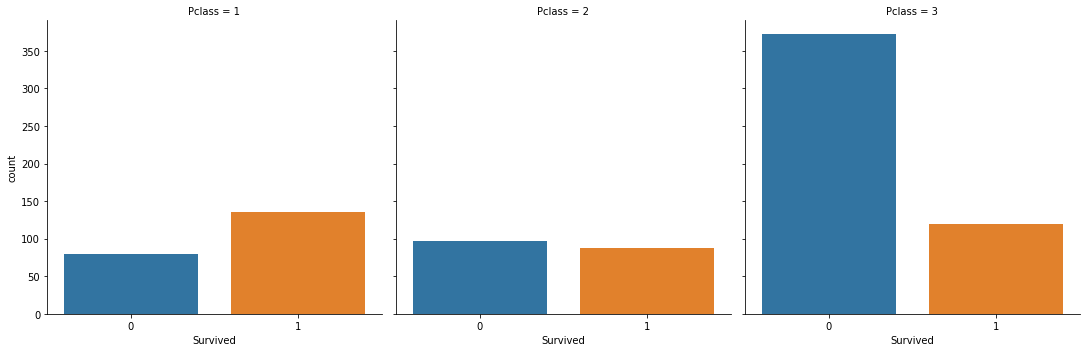

In [0]:
sns.factorplot(x="Survived", col="Pclass", kind="count", data=train)

In [0]:
test['Survived'] = test.Pclass == 1
test['Survived'] = test.Survived.apply(lambda x: int(x))
test.loc[:,['PassengerId', 'Survived']].to_csv('ricos_sobreviventes.csv', index = False)
files.download('ricos_sobreviventes.csv')

In [0]:
mulher = train[train.Sex == 'female']
homem = train[train.Sex == 'male']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
sns.factorplot(x = "Survived", col = "SibSp", kind = "count", data = mulher)

In [0]:
test = pd.get_dummies(test,columns=['Sex','Embarked'])
train = pd.get_dummies(train,columns=['Sex','Embarked'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [0]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_test,y_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, X, y, cv = 5)

In [0]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score 
model_bayes_cv = GaussianNB()                
cross_val_score(model_bayes_cv, X, y, cv = 5)

In [0]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_bayes_cv, X, y, cv=LeaveOneOut())
scores.mean()